# Decision Tree in sklearn

@masahiro rikiso, 170306

* http://scikit-learn.org/stable/modules/tree.html

---

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

## load dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(return_X_y=False)
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

## CV about 1) max_depth

1 0.666666666667 1.11022302463e-16
2 0.953333333333 0.0520683311727
3 0.96 0.0326598632371
4 0.96 0.0442216638714
5 0.953333333333 0.0426874949162
6 0.96 0.0442216638714
7 0.96 0.0442216638714


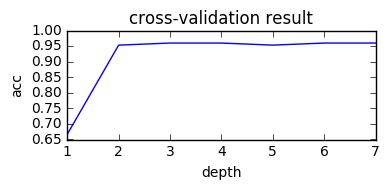

In [19]:
score_mean = []
for depth in range(1,8):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    score = cross_val_score(clf, X, y, cv=10)
    print (depth, score.mean(), score.std())
    score_mean.append(score.mean())
    
plt.figure(figsize=(4,2))
plt.plot(np.arange(1,8), score_mean)
plt.title("cross-validation result")
plt.xlabel("depth")
plt.ylabel("acc")
plt.tight_layout()

## It is good for visualization to set max_depth==3

In [3]:
depth = 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_leaf=5)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [22]:
!pip install -U pydotplus

Requirement already up-to-date: pydotplus in /Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing>=2.0.1 in /Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages (from pydotplus)


In [5]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  

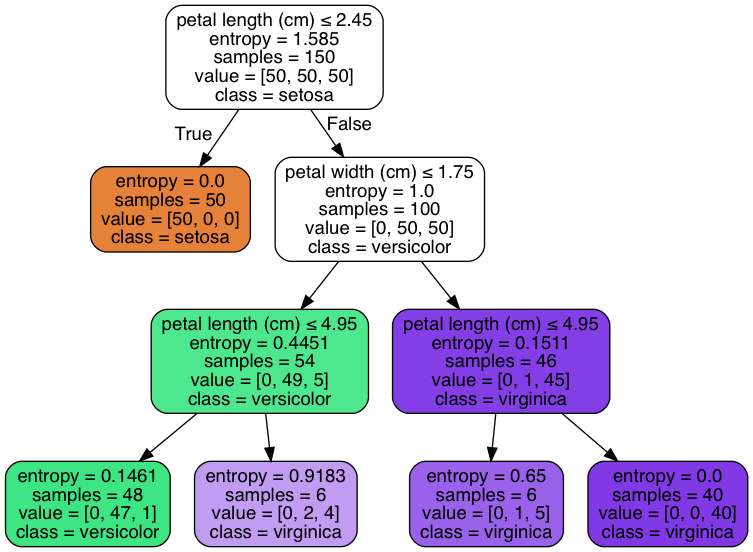

In [6]:
from IPython.display import Image
Image(graph.create_png(), width=500) 

In [12]:
graph.write_png('hoge.png')

True

In [11]:
ls

170306adaboost.ipynb
170306decision_tree.ipynb
170306random_forest.ipynb
170331tsne.ipynb
170331特徴説明_tsne_kmeans_decisiontree.ipynb
170409データ分析テンプレート.ipynb
Untitled.ipynb
boston_tsne_dt.dot
boston_tsne_dt.png
hoge.png
